In [30]:
import os
import numpy as np
import shutil
import random
import keras
from tensorflow.keras.layers import Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.applications.vgg16 import VGG16

In [20]:
root_dir = "C:/Users/Anirudh/OneDrive/Desktop/wasteclassification stage 2/Dataset/"
classes_dir = ['Battery', 'Circuit Board','Earphone','Headphones','Keyboard','Laptop','Mouse','Smartphone']

test_ratio = 0.20

for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'test/' + cls)

    src = root_dir + cls

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    print("**")
    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Testing: ', len(test_FileNames))
    print("**")


    for name in train_FileNames:

            shutil.copy(name, root_dir +'train/' + cls)

    for name in test_FileNames:
           shutil.copy(name, root_dir +'test/' + cls)
print("Copying Done!")

**
Total images:  124
Training:  99
Testing:  25
**
**
Total images:  299
Training:  239
Testing:  60
**
**
Total images:  54
Training:  43
Testing:  11
**
**
Total images:  40
Training:  32
Testing:  8
**
**
Total images:  50
Training:  40
Testing:  10
**
**
Total images:  131
Training:  104
Testing:  27
**
**
Total images:  69
Training:  55
Testing:  14
**
**
Total images:  175
Training:  140
Testing:  35
**
Copying Done!


In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
x_train=train_datagen.flow_from_directory("C:/Users/Anirudh/OneDrive/Desktop/wasteclassification stage 2/Dataset/train",target_size=(224,224),batch_size=64,class_mode = 'categorical')
print(x_train.class_indices)


Found 456 images belonging to 8 classes.
{'Battery': 0, 'Circuit Board': 1, 'Earphone': 2, 'Headphones': 3, 'Keyboard': 4, 'Laptop': 5, 'Mouse': 6, 'Smartphone': 7}


In [22]:
x_test=test_datagen.flow_from_directory("C:/Users/Anirudh/OneDrive/Desktop/wasteclassification stage 2/Dataset/test",target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
print(x_test.class_indices)

Found 116 images belonging to 8 classes.
{'Battery': 0, 'Circuit Board': 1, 'Earphone': 2, 'Headphones': 3, 'Keyboard': 4, 'Laptop': 5, 'Mouse': 6, 'Smartphone': 7}


In [27]:
# Model
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(224,224,3),strides=(1,1),padding='same',activation='relu'))
# model.add(Convolution2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
# model.add(Convolution2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(8,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [33]:
#vgg
input_shape = [224,224]
vgg = VGG16(input_shape = input_shape + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(64, activation='relu')(x)
x = Dense(8, activation = 'softmax')(x)
model = keras.Model(inputs=vgg.input, outputs=x)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)


In [34]:
model.fit_generator(
  x_train,
  validation_data=x_test,
  epochs=10,
  # steps_per_epoch=len(x_train),
  # validation_steps=len(x_test)
)

C:\Users\Anirudh\AppData\Local\Temp/ipykernel_22132/2747983988.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
8/8 [==============================] - 65s 9s/step - loss: 2.0969 - acc: 0.4013 - val_loss: 1.0319 - val_acc: 0.6293
Epoch 2/10
8/8 [==============================] - 69s 9s/step - loss: 0.8012 - acc: 0.6996 - val_loss: 0.4366 - val_acc: 0.8534
Epoch 3/10
8/8 [==============================] - 68s 8s/step - loss: 0.3685 - acc: 0.9101 - val_loss: 0.2730 - val_acc: 0.9052
Epoch 4/10
8/8 [==============================] - 68s 9s/step - loss: 0.2717 - acc: 0.9189 - val_loss: 0.1997 - val_acc: 0.9397
Epoch 5/10
8/8 [==============================] - 69s 9s/step - loss: 0.1777 - acc: 0.9649 - val_loss: 0.2184 - val_acc: 0.9310
Epoch 6/10
8/8 [==============================] - 72s 9s/step - loss: 0.1361 - acc: 0.9737 - val_loss: 0.1726 - val_acc: 0.9397
Epoch 7/10
8/8 [==============================] - 70s 9s/step - loss: 0.1304 - acc: 0.9737 - val_loss: 0.1889 - val_acc: 0.9569
Epoch 8/10
8/8 [==============================] - 67s 8s/step - loss: 0.0953 - acc: 0.9890 - val_loss: 0

In [35]:
model.save("model95")

INFO:tensorflow:Assets written to: model95\assets


In [36]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

model=load_model('C:/Users/Anirudh/OneDrive/Desktop/Self Driving Car/model95')
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

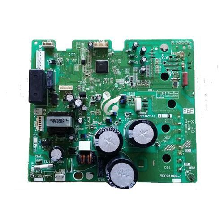

In [37]:
img=image.load_img("C:/Users/Anirudh/OneDrive/Desktop/daikin-ac-pcb-500x500.jpg",target_size=(224,224))
img

In [38]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
model.predict(x).argmax()

1

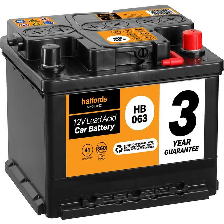

In [41]:
img2=image.load_img("C:/Users/Anirudh/OneDrive/Desktop/Halfords-HB063-Lead-Acid-12V-Car-Battery-3-Year-Guarantee.jpg",target_size=(224,224))
img2


In [42]:
x=image.img_to_array(img2)
x=np.expand_dims(x,axis=0)
model.predict(x).argmax()

0